In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
y = data['target']

In [7]:
X = data.drop(['target'],axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
#Standard Scaler

In [18]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

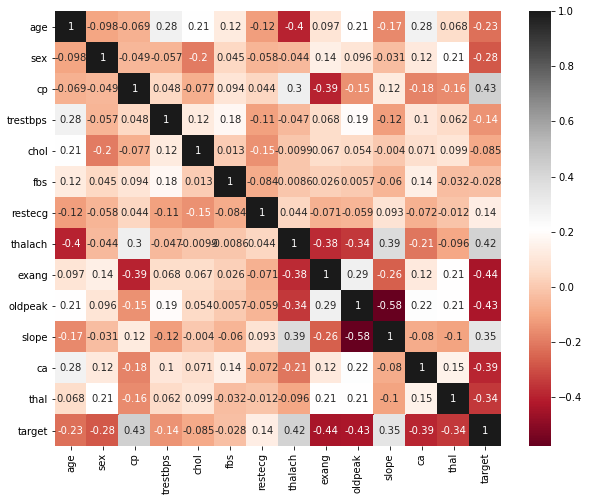

In [29]:
corr_matrix=data.corr()
corr_matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap="RdGy")

In [30]:
#SVM

In [161]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state=101)
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=101)

In [162]:
classifier.support_vectors_

array([[ 0.51014803,  0.7021095 , -0.94863878, ..., -0.65582012,
         1.22652214, -2.16472253],
       [ 0.51014803,  0.7021095 ,  1.93812803, ...,  0.96085273,
         1.22652214, -0.50196464],
       [ 0.29619871,  0.7021095 ,  0.01361682, ...,  0.96085273,
         0.25628821, -0.50196464],
       ...,
       [-0.34564926,  0.7021095 ,  0.97587243, ..., -0.65582012,
        -0.71394573, -0.50196464],
       [ 0.29619871,  0.7021095 , -0.94863878, ..., -0.65582012,
        -0.71394573, -2.16472253],
       [ 1.04502133, -1.42427927, -0.94863878, ...,  0.96085273,
        -0.71394573, -0.50196464]])

In [165]:
coef.values

array([[ 0.0068687 , -0.47372389,  0.70159108, -0.24636025, -0.10647755,
         0.11264798,  0.10593481,  0.21659328, -0.26100471, -0.52761343,
         0.2703417 , -0.49989302, -0.49730898]])

In [166]:
classifier.intercept_

array([0.26492516])

In [172]:
predictions = classifier.predict(X_test)

In [168]:
predictions

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [169]:
from sklearn import metrics

In [183]:
print('Classification Report SVM: \n', metrics.classification_report(y_test,predictions))

Classification Report SVM: 
               precision    recall  f1-score   support

           0       0.92      0.82      0.87        44
           1       0.85      0.94      0.89        47

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



In [184]:
from sklearn.linear_model import LogisticRegression

In [187]:
lr = LogisticRegression(random_state = 0, solver = 'liblinear')

In [188]:
lr.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [191]:
predict = lr.predict(X_test)

In [192]:
print('Classification Report SVM: \n', metrics.classification_report(y_test,predict))

Classification Report SVM: 
               precision    recall  f1-score   support

           0       0.90      0.80      0.84        44
           1       0.83      0.91      0.87        47

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



In [193]:
### Decision Tree

In [194]:
from sklearn.tree import DecisionTreeClassifier

In [195]:
dtc = DecisionTreeClassifier(random_state = 0)

In [196]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [197]:
predict= dtc.predict(X_test)

In [198]:
print('Classification Report Decision Tree: \n', metrics.classification_report(y_test,predict))

Classification Report Decision Tree: 
               precision    recall  f1-score   support

           0       0.88      0.66      0.75        44
           1       0.74      0.91      0.82        47

    accuracy                           0.79        91
   macro avg       0.81      0.79      0.79        91
weighted avg       0.81      0.79      0.79        91



In [209]:
#Random Forest

In [213]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)

In [214]:
print('Classification Report RandomForestClassifier: \n', metrics.classification_report(y_test,pred))

Classification Report RandomForestClassifier: 
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        44
           1       0.82      0.85      0.83        47

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [215]:
#KNN

In [217]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [218]:
print('Classification Report KNN: \n', metrics.classification_report(y_test,pred))

Classification Report KNN: 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        44
           1       0.85      0.83      0.84        47

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.84      0.84      0.84        91



In [219]:
# Naive Bayes

In [223]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
pred = nb.predict(X_test)

In [222]:
print('Classification Report Naieve Bayes: \n', metrics.classification_report(y_test,pred))

Classification Report Naieve Bayes: 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83        44
           1       0.83      0.85      0.84        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



In [227]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

class_model = []

class_model.append(('Logistic Regression', LogisticRegression(solver='liblinear')))
class_model.append(('K Nearest Neighbors', KNeighborsClassifier(n_neighbors=10)))
class_model.append(('Kernal Linear', SVC(kernel = 'linear')))
class_model.append(('Naive Bayes', GaussianNB()))
class_model.append(('Decision Tree', DecisionTreeClassifier(criterion='entropy')))
class_model.append(('Random Forest', RandomForestClassifier(n_estimators=100,criterion='entropy')))

for name, model in class_model:
    kfold = KFold(n_splits=10,random_state=None)
    result = cross_val_score(model, X, y, cv=kfold , scoring='accuracy')
    print(result.mean())

0.794516129032258
0.5639784946236558
0.8208602150537635
0.8047311827956989
0.732258064516129
0.7618279569892473


In [225]:
class_model

[('Logistic Regression', LogisticRegression(solver='liblinear'))]